# Summary

Hierarchical clustering from Scikit-Learn was utilized to identify the patterns of 200 customers at a mall. A dendogram was created from Scipy to determine the number of optimal clusters. The customer dataset consisted of gender, age, annual income, and spending score. The goal was to extract some insights of the mall's customers. 

The model determined clusters of customers some of which could be targeted with advertisements or deals.

# Data preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
#Import the dataset
dataset = pd.read_csv('Mall_Customers.csv') 
X = dataset.iloc[:,1:].values

In [3]:
#Using label encoder for the gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

# Building the model

## Determining the optimal number of clusters from a dendogram

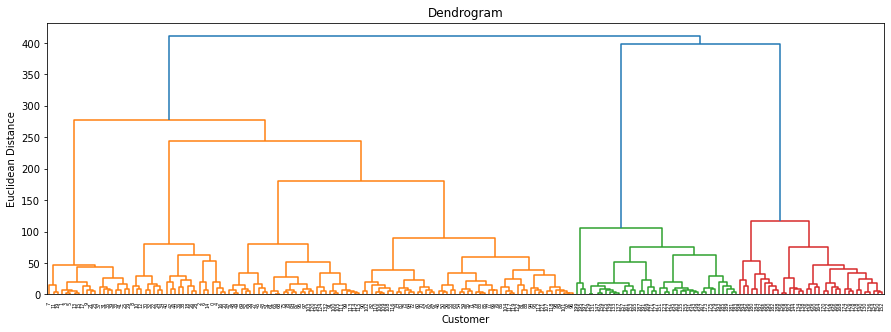

In [4]:
#Build the dendogram using scipy
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean Distance')
plt.show()

Based on the dendogram, the optimal number of clusters would be 3, however, there is clear seperation between some of the data points in the clusters. Will be using a cluster size of 5 instead.

## Training the model with the optimal number of clusters

In [5]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred = hc.fit_predict(X)

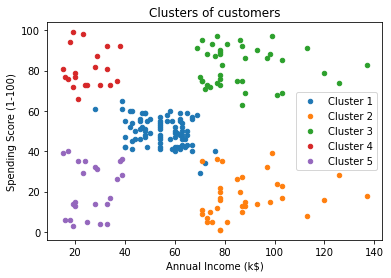

In [6]:
#Visualizing the results
#Column to visualize vs spending score
col = 2
col_dict = {0:'Gender', 1:'Age', 2:'Annual Income (k$)', 3:'Spending Score (1-100)'}
for i in range(0, hc.n_clusters):
    plt.scatter(X[y_pred == i, col], X[y_pred == i, 3], s = 20, label = 'Cluster %s' % str(i+1))
plt.title('Clusters of customers')
plt.xlabel(col_dict[col])
plt.ylabel(col_dict[3])
plt.legend()